# Olympic Medalists Analysis

### Data
#### Olympic medal winners: every one since 1896 as open data
https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data#data

### Challenges
1. What is a gender ratio in gold medal?
2. In which sports did male/female athletes win gold medals?
3. Is there a record which has a name 'Florence' in US? What is her full name?
4.In which events did Jesse Owens win a medal?
5. Which country has won the most men's gold medals in single badminton over the years? 
6. Which ten countires have won the most medals in recent years (from 1984 to 2008)?
7. Display the male gold medal winners for the 100m track over the years.
8. What were the different sports in the first olympics? Plot them using different graphs.
9. How many medals have been won by men and women in the history of the Olympics. How many gold, silver and bronze medals were won for each gender?
10. Plot the total number of medals awarded at each of the Olympic games throughout history.
11. Set the index to Ahtelete, then sort index alphabetically.
12. Plot the total number of medals awarded at each of the Olympic games throughout history.
13. Create a list showing total number of medals won for each country over the history of the olympics. For each country, include the year of the first and most recent Olympic medal wins.
14. Create a dataframe of  Athletes winning medals in Beijing Olympics 100m or 200m track event.
15. Plot the number of gold medals won by the US male and female ahtletes the history of the Olympics.
16. Plot the five athtletes who have won the most gold medals over the history of the Olympics. When there is a tie, consider the number of silver medals, and then bronze medals.
17. Present a summary of total medals won by top 20 countries in the 2008 Olympics.

### Setting Up The Environment

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
absolute_path = '/content/drive/MyDrive/Data'
%cd $absolute_path

/content/drive/MyDrive/Data


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
pd.__version__

'1.3.5'

### Reading & Exploring

In [5]:
olympics = pd.read_csv('olympics.csv', skiprows=4)

In [6]:
olympics.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


In [7]:
olympics.tail(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold
29215,Beijing,2008,Wrestling,Wrestling Gre-R,"BAROEV, Khasan",RUS,Men,96 - 120kg,M,Silver


In [8]:
olympics.shape

(29216, 10)

In [9]:
# Validate if null values exist
olympics.isna().values.any()

False

In [10]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [11]:
olympics.Edition.value_counts()

2008    2042
2000    2015
2004    1998
1996    1859
1992    1705
1988    1546
1984    1459
1980    1387
1976    1305
1920    1298
1972    1185
1968    1031
1964    1010
1952     889
1912     885
1956     885
1924     884
1960     882
1936     875
1948     814
1908     804
1928     710
1932     615
1900     512
1904     470
1896     151
Name: Edition, dtype: int64

In [12]:
len(olympics.NOC.unique())

138

In [13]:
olympics.Discipline.value_counts().head(20)

Athletics          3448
Rowing             2523
Swimming           2439
Artistic G.        2103
Fencing            1547
Football           1387
Hockey             1325
Shooting           1105
Sailing            1061
Basketball          940
Canoe / Kayak F     912
Handball            886
Water polo          880
Volleyball          862
Boxing              842
Cycling Track       692
Wrestling Free.     591
Wrestling Gre-R     549
Weightlifting       548
Judo                435
Name: Discipline, dtype: int64

In [14]:
olympics.Gender.value_counts()

Men      21721
Women     7495
Name: Gender, dtype: int64

In [15]:
olympics.Event_gender.value_counts()

M    20067
W     7278
X     1871
Name: Event_gender, dtype: int64

In [16]:
olympics.sort_values(by=['Edition', 'Athlete'])

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
82,Athens,1896,Gymnastics,Artistic G.,"ANDRIAKOPOULOS, Nicolaos",GRE,Men,rope climbing,M,Gold
110,Athens,1896,Gymnastics,Artistic G.,"ANDRIAKOPOULOS, Nicolaos",GRE,Men,"team, parallel bars",M,Silver
111,Athens,1896,Gymnastics,Artistic G.,"ATHANASOPOULOS, Spyros",GRE,Men,"team, parallel bars",M,Silver
48,Athens,1896,Cycling,Cycling Road,"BATTEL, Edward",GBR,Men,individual road race,M,Bronze
...,...,...,...,...,...,...,...,...,...,...
28095,Beijing,2008,Equestrian,Dressage,"ZU-SAYN WITTGENSTEIN, Nathalie",DEN,Women,team,X,Bronze
28819,Beijing,2008,Sailing,Sailing,"ZUBARI, Shahar",ISR,Men,RS:X - Windsurfer,M,Bronze
28977,Beijing,2008,Taekwondo,Taekwondo,"ZUBCIC, Martina",CRO,Women,49 - 57 kg,W,Bronze
28387,Beijing,2008,Gymnastics,Rhythmic G.,"ZUEVA, Natalia",RUS,Women,group competition,W,Gold


### 1. What is a gender ratio in gold medal?

In [17]:
women_gold = olympics[(olympics.Medal == 'Gold') & (olympics.Gender == 'Women')]
women_gold

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
417,Paris,1900,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,individual,W,Gold
641,Paris,1900,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,mixed doubles,X,Gold
649,Paris,1900,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,singles,W,Gold
710,St Louis,1904,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,double columbia round (50y - 40y - 30y),W,Gold
713,St Louis,1904,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,double national round (60y - 50y),W,Gold
...,...,...,...,...,...,...,...,...,...,...
29134,Beijing,2008,Weightlifting,Weightlifting,"CAO, Lei",CHN,Women,75kg,W,Gold
29147,Beijing,2008,Wrestling,Wrestling Free.,"HUYNH, Carol",CAN,Women,- 48kg,W,Gold
29155,Beijing,2008,Wrestling,Wrestling Free.,"YOSHIDA, Saori",JPN,Women,48 - 55kg,W,Gold
29163,Beijing,2008,Wrestling,Wrestling Free.,"ICHO, Kaori",JPN,Women,55 - 63kg,W,Gold


In [18]:
total_gold = olympics[olympics.Medal == 'Gold']

In [19]:
women_ratio_gold = round(len(women_gold) / len(total_gold), 4)
women_ratio_gold

0.2523

### 2. In which sports did male/female athletes win gold medals?

In [20]:
men_gold = olympics[(olympics.Medal == 'Gold') & (olympics.Gender == 'Men')]

In [21]:
men_gold.Sport.value_counts().head(10)

Athletics     795
Aquatics      778
Rowing        645
Gymnastics    539
Fencing       433
Football      399
Wrestling     365
Sailing       365
Shooting      332
Hockey        326
Name: Sport, dtype: int64

In [22]:
women_gold['Sport'].value_counts().head(10)

Aquatics         524
Athletics        356
Gymnastics       250
Rowing           197
Volleyball       152
Handball         128
Hockey           128
Basketball       108
Fencing           97
Canoe / Kayak     76
Name: Sport, dtype: int64

### 3. Is there a record which has a name 'Florence' in US? What is her full name? 

In [23]:
olympics[(olympics.Athlete.str.contains('Florence')) & (olympics.NOC == 'USA')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
16817,Los Angeles,1984,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,200m,W,Silver
18287,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,100m,W,Gold
18305,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,200m,W,Gold
18347,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,4x100m relay,W,Gold
18374,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,4x400m relay,W,Silver


### 4. In which events did Jesse Owens win a medal?

In [24]:
jo = olympics[olympics.Athlete == 'OWENS, Jesse']
jo

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold
6523,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,long jump,M,Gold


In [25]:
jo.Event.value_counts()

100m            1
200m            1
4x100m relay    1
long jump       1
Name: Event, dtype: int64

### 5. Which country has won the most men's gold medals in singles badminton over the years?   

In [26]:
men_gold_single_badminton = olympics[(olympics.Gender == 'Men') & (olympics.Medal == 'Gold') & (olympics.Sport == 'Badminton') & (olympics.Event == 'singles')]
men_gold_single_badminton

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold
21787,Atlanta,1996,Badminton,Badminton,"HOYER-LARSEN, Poul Erik",DEN,Men,singles,M,Gold
23717,Sydney,2000,Badminton,Badminton,"JI, Xinpeng",CHN,Men,singles,M,Gold
25734,Athens,2004,Badminton,Badminton,"HIDAYAT, Taufik",INA,Men,singles,M,Gold
27741,Beijing,2008,Badminton,Badminton,"LIN, Dan",CHN,Men,singles,M,Gold


In [27]:
men_gold_single_badminton.NOC.value_counts()

INA    2
CHN    2
DEN    1
Name: NOC, dtype: int64

Indonesia and China

### 6. Which ten countires have won the most medals in recent years (from 1984 to 2008)?

In [28]:
recent_medals_by_country = olympics[olympics.Edition >= 1984]
recent_medals_by_country.NOC.value_counts().head(10)

USA    1837
AUS     762
GER     691
CHN     679
RUS     638
KOR     437
ITA     418
NED     407
FRA     400
GBR     390
Name: NOC, dtype: int64

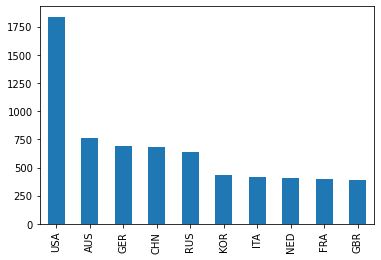

In [29]:
recent_medals_by_country.NOC.value_counts().head(10).plot(kind='bar')

### 7. Display the male gold medal winners for the 100m track over the years in most recent order. Show the Olympic City, Edition, Athlete and the country they represent.

In [30]:
men_gold_medal_100mtrack = olympics[(olympics.Gender == 'Men') & (olympics.Medal == 'Gold') & (olympics.Event == '100m')]
men_gold_medal_100mtrack.sort_values(by='Edition', ascending=False)[['City','Edition','Athlete','NOC']]

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


### 8. What were the different sports in the first olympics? Plot them using different graphs.

In [31]:
first_olympics = olympics[olympics.Edition == 1896]
first_olympics.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [32]:
first_olympics.Sport.value_counts()

Gymnastics       45
Athletics        37
Cycling          16
Shooting         15
Aquatics         11
Tennis           10
Fencing           8
Weightlifting     6
Wrestling         3
Name: Sport, dtype: int64

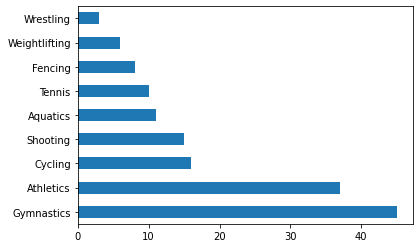

In [33]:
first_olympics.Sport.value_counts().plot(kind='barh')

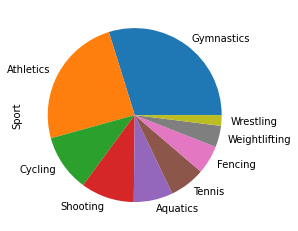

In [34]:
first_olympics.Sport.value_counts().plot(kind='pie')

### 9. How many medals have been won by men and women in the history of the Olympics. How many gold, silver and bronze medals were won for each gender?

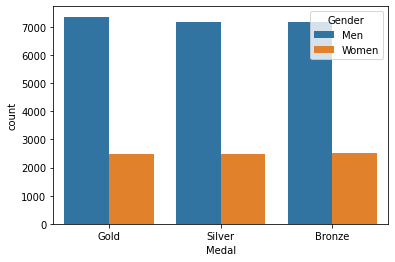

In [35]:
sns.countplot(x='Medal', data=olympics, hue='Gender')

### 10. Plot the number of medals achieved by the Chinese team in Beijing 2008.

In [36]:
china_2008 = olympics[(olympics.Edition == 2008) & (olympics.NOC == 'CHN')]
china_2008.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
27180,Beijing,2008,Aquatics,Diving,"QIN, Kai",CHN,Men,3m springboard,M,Bronze
27181,Beijing,2008,Aquatics,Diving,"HE, Chong",CHN,Men,3m springboard,M,Gold


In [37]:
china_2008.Gender.value_counts()

Women    128
Men       56
Name: Gender, dtype: int64

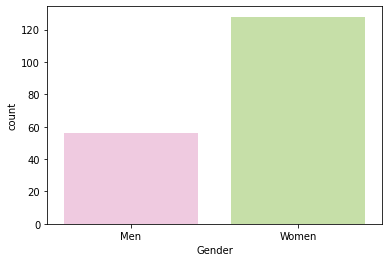

In [38]:
sns.countplot(data=china_2008, x='Gender', palette='PiYG')

### 11. Set the index to Ahtelete, then sort index alphabetically.

In [39]:
ath = olympics.set_index('Athlete')
ath.sort_index().head()

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"AABYE, Edgar",Paris,1900,Tug of War,Tug of War,ZZX,Men,tug of war,M,Gold
"AALTONEN, Arvo Ossian",Antwerp,1920,Aquatics,Swimming,FIN,Men,200m breaststroke,M,Bronze
"AALTONEN, Arvo Ossian",Antwerp,1920,Aquatics,Swimming,FIN,Men,400m breaststroke,M,Bronze
"AALTONEN, Paavo Johannes",London,1948,Gymnastics,Artistic G.,FIN,Men,pommel horse,M,Gold
"AALTONEN, Paavo Johannes",London,1948,Gymnastics,Artistic G.,FIN,Men,team competition,M,Gold


In [40]:
ath.loc['BOLT, Usain']

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"BOLT, Usain",Beijing,2008,Athletics,Athletics,JAM,Men,100m,M,Gold
"BOLT, Usain",Beijing,2008,Athletics,Athletics,JAM,Men,200m,M,Gold
"BOLT, Usain",Beijing,2008,Athletics,Athletics,JAM,Men,4x100m relay,M,Gold


### 12. Plot the total number of medals awarded at each of the Olympic games throughout history.

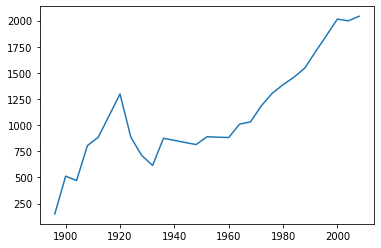

In [41]:
olympics.Edition.value_counts().sort_index().plot()

### 13. Create a list showing total number of medals won for each country over the history of the olympics. For each country, include the year of the first and most recent Olympic medal wins.

In [42]:
olympics.groupby('NOC').agg({'Edition': ['count', 'min', 'max']})

Edition            
      count   min   max
NOC                    
AFG       1  2008  2008
AHO       1  1988  1988
ALG      14  1984  2008
ANZ      29  1908  1912
ARG     239  1924  2008
..      ...   ...   ...
VIE       2  2000  2008
YUG     435  1924  2000
ZAM       2  1984  1996
ZIM      23  1980  2008
ZZX      48  1896  1904

[138 rows x 3 columns]

### 14. Create a dataframe of  Athletes winning medals in Beijing Olympics 100m or 200m track event.

In [43]:
ath_Beijing = olympics[(olympics.City == 'Beijing') & ((olympics.Event == '100m') | (olympics.Event == '200m'))]
ath_Beijing

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27551,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,100m,M,Bronze
27552,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,100m,M,Gold
27553,Beijing,2008,Athletics,Athletics,"THOMPSON, Richard",TRI,Men,100m,M,Silver
27554,Beijing,2008,Athletics,Athletics,"FRASER, Shelly-ann",JAM,Women,100m,W,Gold
27555,Beijing,2008,Athletics,Athletics,"SIMPSON, Sherone",JAM,Women,100m,W,Silver
27556,Beijing,2008,Athletics,Athletics,"STEWART, Kerron",JAM,Women,100m,W,Silver
27569,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,200m,M,Bronze
27570,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,200m,M,Gold
27571,Beijing,2008,Athletics,Athletics,"CRAWFORD, Shawn",USA,Men,200m,M,Silver
27572,Beijing,2008,Athletics,Athletics,"STEWART, Kerron",JAM,Women,200m,W,Bronze


In [44]:
ath_Beijing_df = ath_Beijing.groupby(['NOC', 'Gender', 'Discipline', 'Event']).size()
ath_Beijing_df

NOC  Gender  Discipline  Event
JAM  Men     Athletics   100m     1
                         200m     1
     Women   Athletics   100m     3
                         200m     2
TRI  Men     Athletics   100m     1
USA  Men     Athletics   100m     1
                         200m     2
     Women   Athletics   200m     1
dtype: int64

In [45]:
ath_Beijing_df = ath_Beijing_df.unstack(['Discipline', 'Event'])
ath_Beijing_df

Discipline Athletics     
Event           100m 200m
NOC Gender               
JAM Men          1.0  1.0
    Women        3.0  2.0
TRI Men          1.0  NaN
USA Men          1.0  2.0
    Women        NaN  1.0

In [46]:
ath_Beijing_df_stacked = ath_Beijing_df.stack('Event')
ath_Beijing_df_stacked

Discipline        Athletics
NOC Gender Event           
JAM Men    100m         1.0
           200m         1.0
    Women  100m         3.0
           200m         2.0
TRI Men    100m         1.0
USA Men    100m         1.0
           200m         2.0
    Women  200m         1.0

In [47]:
ath_Beijing_df_unstacked = ath_Beijing_df.unstack('Gender')
ath_Beijing_df_unstacked

Discipline Athletics                 
Event           100m       200m      
Gender           Men Women  Men Women
NOC                                  
JAM              1.0   3.0  1.0   2.0
TRI              1.0   NaN  NaN   NaN
USA              1.0   NaN  2.0   1.0

### 15. Plot the number of gold medals won by the US male and female ahtletes the history of the Olympics.

In [48]:
US_ath_gold = olympics[(olympics.NOC == 'USA') & (olympics.Medal == 'Gold')]
US_ath_gold.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold
29,Athens,1896,Athletics,Athletics,"CLARK, Ellery",USA,Men,high jump,M,Gold


In [49]:
US_ath_gold_df = US_ath_gold.groupby(['Edition', 'Gender']).size().unstack('Gender', fill_value=0)
US_ath_gold_df

Gender,Men,Women
Edition,,
1896,11,0
1900,26,1
1904,140,6
1908,34,0
1912,45,0
1920,103,7
1924,95,15
1928,34,9
1932,61,17


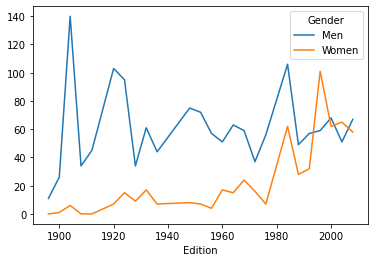

In [50]:
US_ath_gold_df.plot()

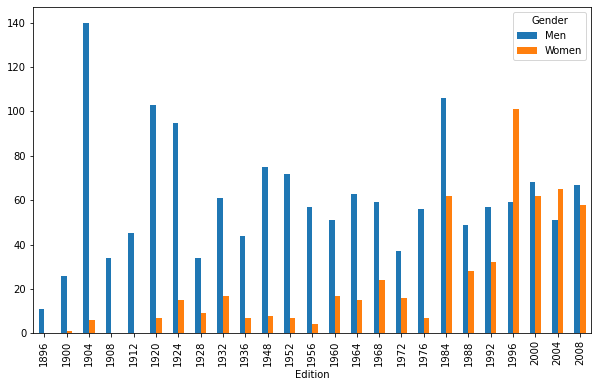

In [51]:
US_ath_gold_df.plot(kind='bar', figsize = (10,6))

### 16. Plot the five athtletes who have won the most gold medals over the history of the Olympics. When there is a tie, consider the number of silver medals, and then bronze medals.

In [52]:
most_gold_ath = olympics.groupby(['Athlete', 'Medal']).size().unstack('Medal', fill_value=0)
top5_gold_ath = most_gold_ath.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver','Bronze']].iloc[:5]
top5_gold_ath

Medal,Gold,Silver,Bronze
Athlete,,,
"PHELPS, Michael",14,0,2
"LATYNINA, Larisa",9,5,4
"NURMI, Paavo",9,3,0
"SPITZ, Mark",9,1,1
"LEWIS, Carl",9,1,0


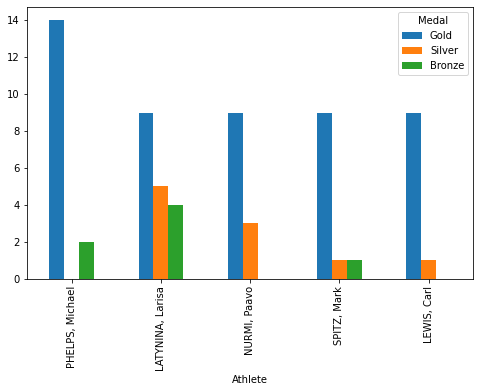

In [53]:
top5_gold_ath.plot(kind='bar', figsize=(8,5))

### 17. Present a summary of total medals won by top 20 countries in the 2008 Olympics.

In [54]:
beijing = olympics[olympics.Edition == 2008]

In [55]:
g_beijing = beijing.groupby(['NOC', 'Medal']).size().unstack('Medal', fill_value=0)
g_beijing 

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1,0,0
ALG,1,0,1
ARG,31,20,0
ARM,6,0,0
AUS,76,31,42
...,...,...,...
USA,81,125,109
UZB,3,1,2
VEN,1,0,0


In [56]:
top20_beijing = g_beijing.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver', 'Bronze']].iloc[:20]
top20_beijing

Medal,Gold,Silver,Bronze
NOC,,,
USA,125,109,81
CHN,74,53,57
RUS,43,44,56
GER,42,16,43
KOR,41,11,26
NED,40,18,4
AUS,31,42,76
GBR,31,25,21
FRA,25,23,28


In [57]:
top20_beijing.transpose()

NOC,USA,CHN,RUS,GER,KOR,NED,AUS,GBR,FRA,JPN,ARG,HUN,NOR,BRA,CAN,UKR,JAM,ITA,BLR,ESP
Medal,,,,,,,,,,,,,,,,,,,,
Gold,125,74,43,42,41,40,31,31,25,23,20,16,16,14,11,10,9,8,8,7
Silver,109,53,44,16,11,18,42,25,23,11,0,8,5,34,13,5,3,14,5,48
Bronze,81,57,56,43,26,4,76,21,28,17,31,3,1,27,10,16,5,20,17,16


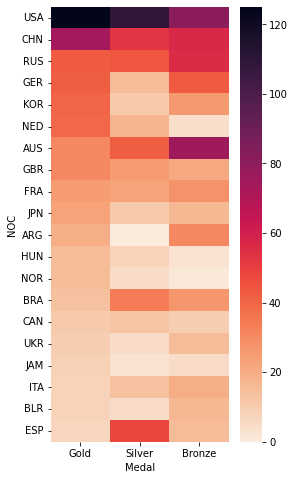

In [58]:
plt.figure(figsize= (4,8))
sns.heatmap(top20_beijing, cmap="rocket_r")